**Cab Price Data Set**

1. ID: These are unique identifiers for each record.
2. Customer_Type: Indicates whether the customer is “Passive.”
3. Customer_Age: The age of the customer.
4. Source_location_type: The type of location where the trip originates (e.g., “Inside_City”).
5. Destination_location_type: The type of location where the trip ends (e.g., “Outside_City”).
6. Distance: The distance of the trip.
7. Peak: Whether the trip occurred during peak hours (“Yes” or “No”).
8. Traffic: The traffic conditions during the trip.
9. Time: The time of day when the trip took place (e.g., “Night,” “Evening,” or “Morning”).
10. Weather: The weather conditions during the trip (e.g., “Windy” or “Sunny”).
11. Is_weekend: Indicates whether the trip occurred on a weekend (“Yes” or “No”).
12. Customer_demand: A numerical value representing customer demand.



In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the file path
file_path = '/content/drive/MyDrive/Data_set/k-data.db'

# Connect to the SQLite database
conn = sqlite3.connect(file_path)

# Define your SQL query
sql_query = 'SELECT * FROM test'  # Replace 'your_table_name' with the actual table name

# Use pandas to read the query result into a DataFrame
data = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
data.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand
0,0x108fd,Passive,26.0,Inside_City,Outside_City,6.7,No,63.8,Night,Windy,No,5.81
1,0xaa0f,Passive,30.0,Inside_City,Outside_City,3.0,Yes,84.6,Evening,Windy,No,6.74
2,0x791d,Passive,24.0,Inside_City,Outside_City,6.8,No,63.6,Morning,Sunny,No,4.77
3,0x149c,New,20.0,Inside_City,Outside_City,6.0,No,####,Night,Rainy,No,1.97
4,0x1a77,Inactive,59.0,Inside_City,Inside_City,4.5,Yes,69.8,Morning,Sunny,No,9.68


In [4]:
import sqlite3
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Data_set/k-data.db'

# Connect to the SQLite database
conn = sqlite3.connect(file_path)

# Define your SQL query
sql_query = 'SELECT * FROM TRAIN'  # Replace 'your_table_name' with the actual table name

# Use pandas to read the query result into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand,Price
0,0x2cd1,New,14.0,Inside_City,Outside_City,7.6,No,48.6,Morning,Sunny,No,7.36,6.84
1,0x10985,New,25.0,Outside_City,Inside_City,8.1,Yes,85.8,Midday,Sunny,No,6.42,8.71
2,0xae8d,New,19.0,Inside_City,Inside_City,13.1,No,86.0,Morning,Sunny,Yes,NaN,10.16
3,0x86ab,Regular,46.0,Inside_City,Inside_City,4.7,No,67.1,Midnight,Windy,No,6.19,13.44
4,0x8c,Inactive,52.0,Inside_City,Outside_City,2.6,No,39.8,Midday,Rainy,No,5.83,11.49


In [5]:

df.describe()


,Customer_Age,Distance,Customer_demand,Price
count,55725.000000,54789.000000,52040.000000,57202.000000
mean,30.773728,12.143731,5.097112,11.064933
std,17.226959,15.354749,1.897034,4.734677
min,0.000000,0.500000,0.000000,1.010000
25%,23.000000,5.200000,3.660000,7.630000
50%,29.000000,9.000000,5.060000,10.280000
75%,34.000000,15.300000,6.360000,13.930000
max,279.000000,219.000000,10.000000,33.430000


In [6]:
# Perform EDA on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57202 entries, 0 to 57201
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         57202 non-null  object 
 1   Customer_Type              57202 non-null  object 
 2   Customer_Age               55725 non-null  float64
 3   Source_location_type       57202 non-null  object 
 4   Destination_location_type  57202 non-null  object 
 5   Distance                   54789 non-null  float64
 6   Peak                       57202 non-null  object 
 7   Traffic                    57202 non-null  object 
 8   Time                       57202 non-null  object 
 9   Weather                    57202 non-null  object 
 10  Is_weekend                 57202 non-null  object 
 11  Customer_demand            52040 non-null  float64
 12  Price                      57202 non-null  float64
dtypes: float64(4), object(9)
memory usage: 5.7+ MB

In [7]:
# Explore Structure and Size
print("\n ======Structure and Size:======")
print("Number of rows and columns:", df.shape)
print("\n ====== Data types of each variable: ======")
print(df.dtypes)
print("\n. ====== Missing values:  ======")
print(df.isnull().sum())


 ======Structure and Size:======
Number of rows and columns: (57202, 13)

 ====== Data types of each variable: ======
ID                            object
Customer_Type                 object
Customer_Age                 float64
Source_location_type          object
Destination_location_type     object
Distance                     float64
Peak                          object
Traffic                       object
Time                          object
Weather                       object
Is_weekend                    object
Customer_demand              float64
Price                        float64
dtype: object

. ====== Missing values:  ======
ID                              0
Customer_Type                   0
Customer_Age                 1477
Source_location_type            0
Destination_location_type       0
Distance                     2413
Peak                            0
Traffic                         0
Time                            0
Weather                         0
Is_weekend  

In [8]:
# Check the correlation between columns
df.corr()

<ipython-input-8-b9443b8b053e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Customer_Age,Distance,Customer_demand,Price
Customer_Age,1.000000,-0.004272,-0.002960,0.068149
Distance,-0.004272,1.000000,-0.022680,0.286810
Customer_demand,-0.002960,-0.022680,1.000000,0.396626
Price,0.068149,0.286810,0.396626,1.000000



===== Univariate Analysis: =====

Univariate Analysis of Customer_Age:


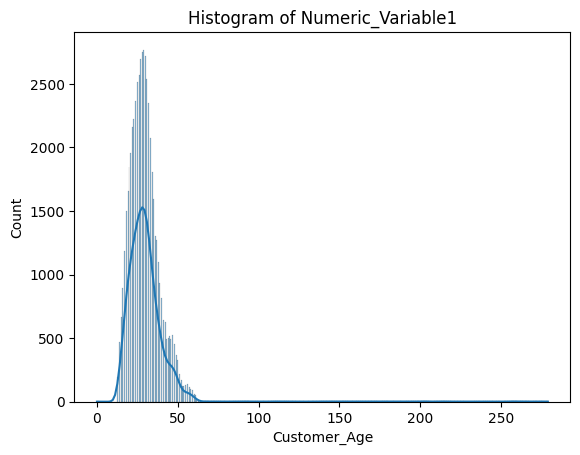


Univariate Analysis of Distance:


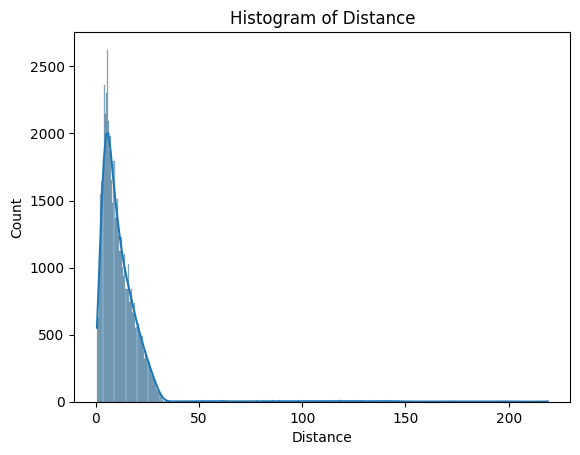


Univariate Analysis of Customer_demand:


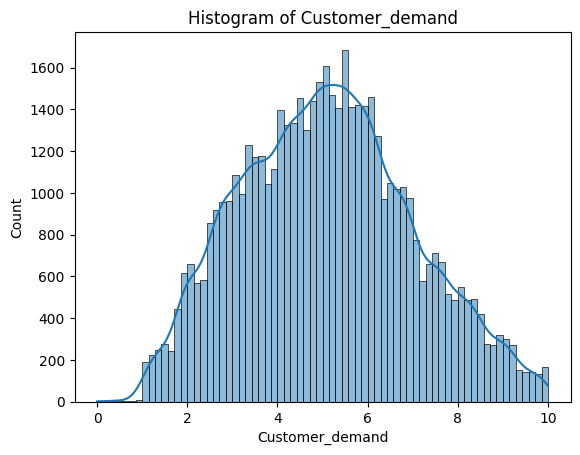

In [9]:
# Univariate Analysis
print("\n===== Univariate Analysis: =====")

print("\nUnivariate Analysis of Customer_Age:")
# Visualize the distribution of Numeric_Variable1
sns.histplot(df['Customer_Age'], kde=True)
plt.title('Histogram of Numeric_Variable1')
plt.show()

print("\nUnivariate Analysis of Distance:")
# Visualize the distribution of Numeric_Variable1
sns.histplot(df['Distance'], kde=True)
plt.title('Histogram of Distance')
plt.show()

print("\nUnivariate Analysis of Customer_demand:")
# Visualize the distribution of Numeric_Variable1
sns.histplot(df['Customer_demand'], kde=True)
plt.title('Histogram of Customer_demand')
plt.show()


 ========Bivariate Analysis :========

Bivariate Analysis x='Customer_Age', y='Price' :


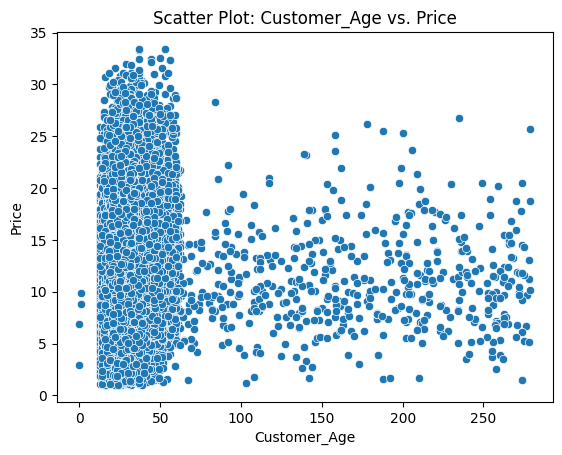


Bivariate Analysis  x='Distance', y='Price' :


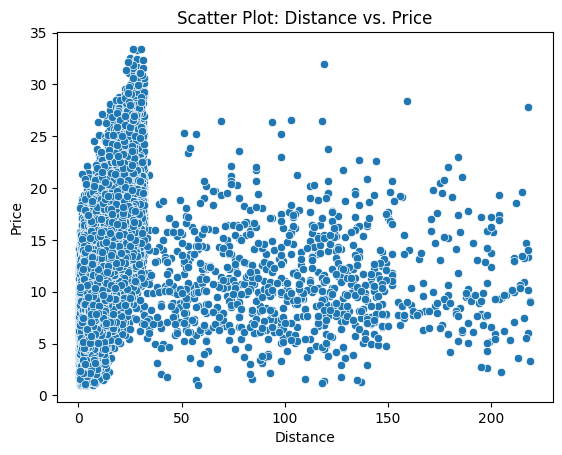


Bivariate Analysis x='Customer_demand', y='Price' : 


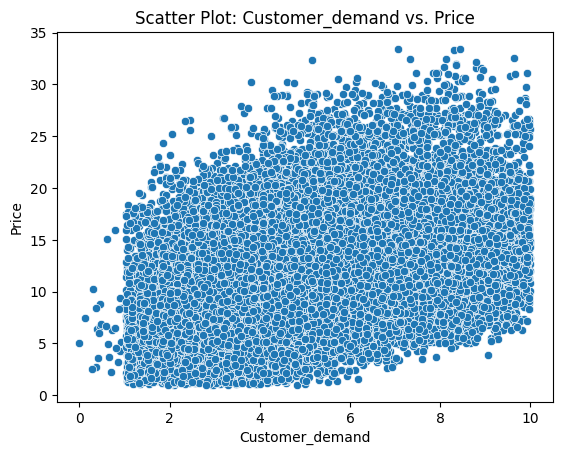

In [10]:
# Customer_Age	Distance	Customer_demand	Price
print("\n ========Bivariate Analysis :========")
# Bivariate Analysis
print("\nBivariate Analysis x='Customer_Age', y='Price' :")
# Explore the relationship between Customer_Age and Price
sns.scatterplot(x='Customer_Age', y='Price', data=df)
plt.title('Scatter Plot: Customer_Age vs. Price')
plt.show()

print("\nBivariate Analysis  x='Distance', y='Price' :")
# Explore the relationship between Distance and Price
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Scatter Plot: Distance vs. Price')
plt.show()

print("\nBivariate Analysis x='Customer_demand', y='Price' : ")
# Explore the relationship between Customer_demand and Price
sns.scatterplot(x='Customer_demand', y='Price', data=df)
plt.title('Scatter Plot: Customer_demand vs. Price')
plt.show()


Multivariate Analysis:


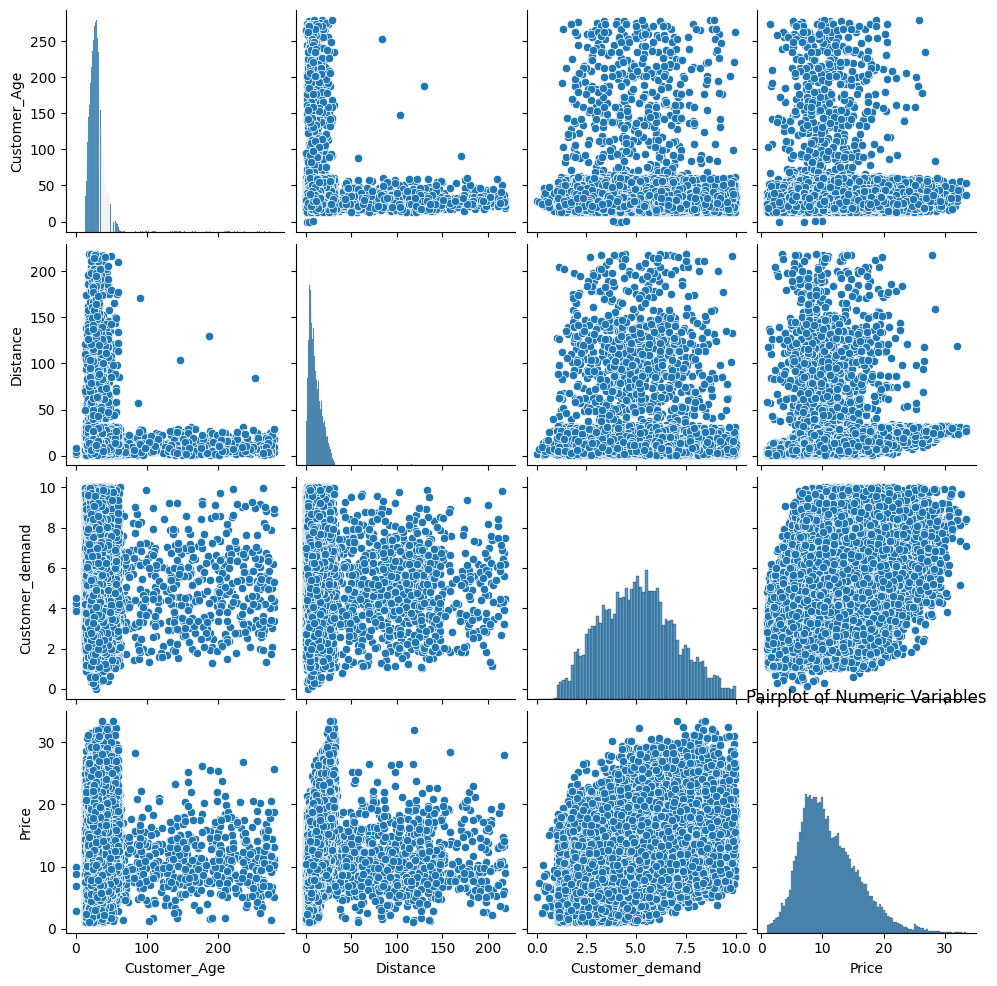

In [11]:
# Multivariate Analysis
print("\nMultivariate Analysis:")
# Explore relationships involving three variables using pairplot
sns.pairplot(df)
plt.title('Pairplot of Numeric Variables')
plt.show()


Utilize Techniques Like Heatmap or Parallel Coordinates:


<ipython-input-12-b4f485352c3c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


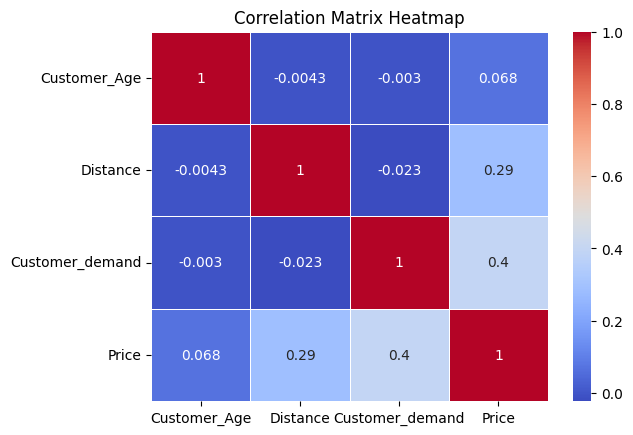

In [12]:
# Utilize Techniques Like Heatmap or Parallel Coordinates
print("\nUtilize Techniques Like Heatmap or Parallel Coordinates:")
# Create a heatmap to visualize the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


===== Data Visualization:  =====

Data Visualization Customer_Type:


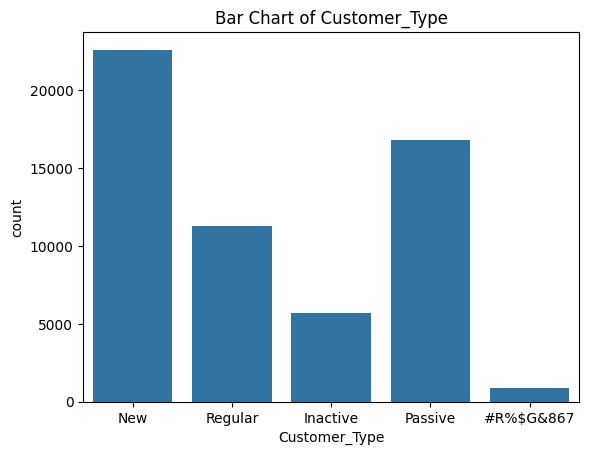


Data Visualization Source_location_type:


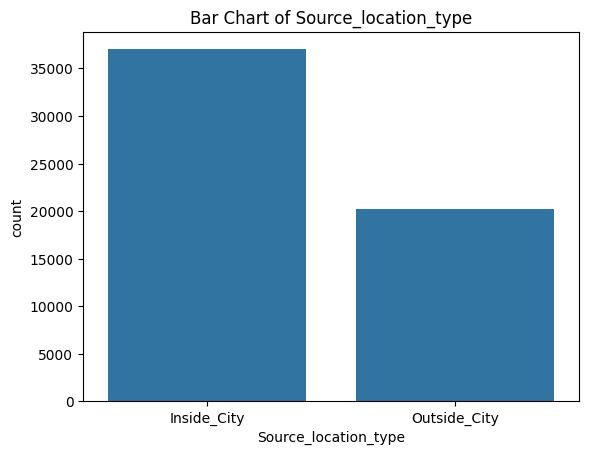


Data Visualization Destination_location_type:


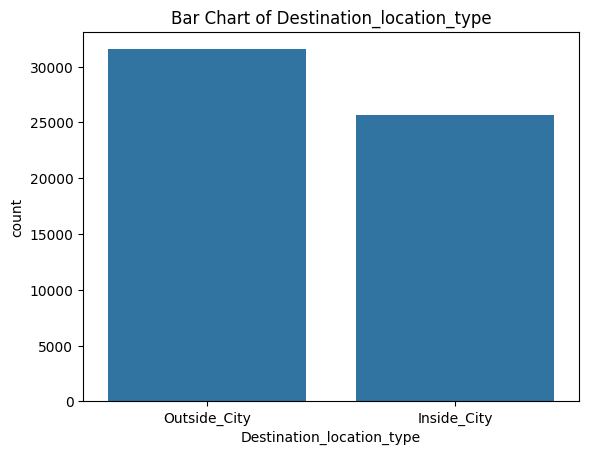


Data Visualization Peak:


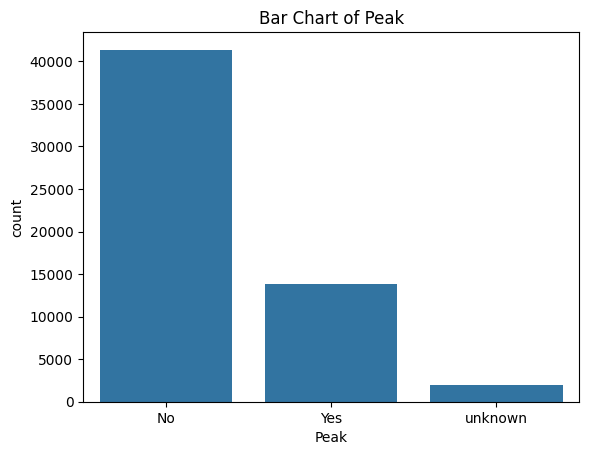


Data Visualization Time:


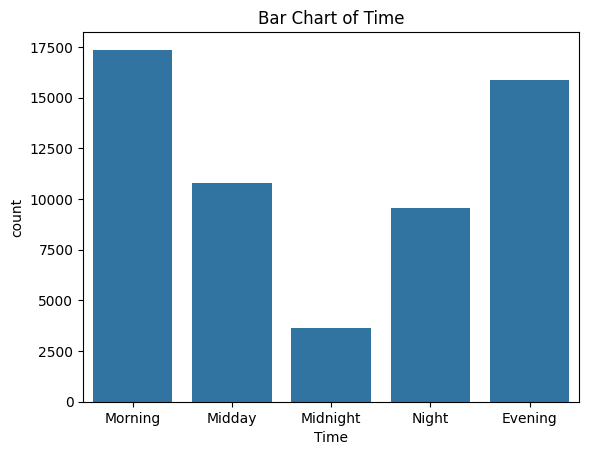


Data Visualization Weather:


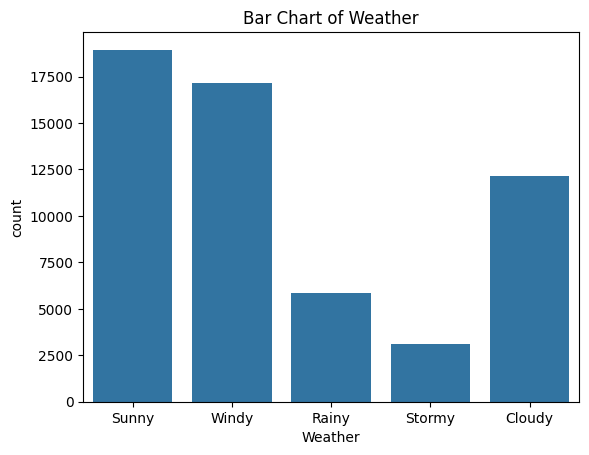


Data Visualization Is_weekend:


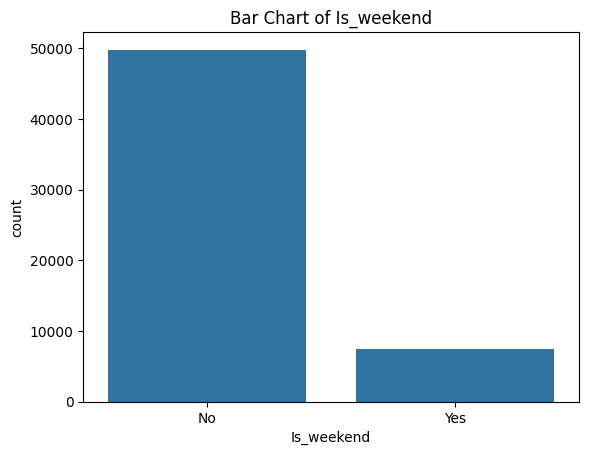


Data Visualization Source_location_type:


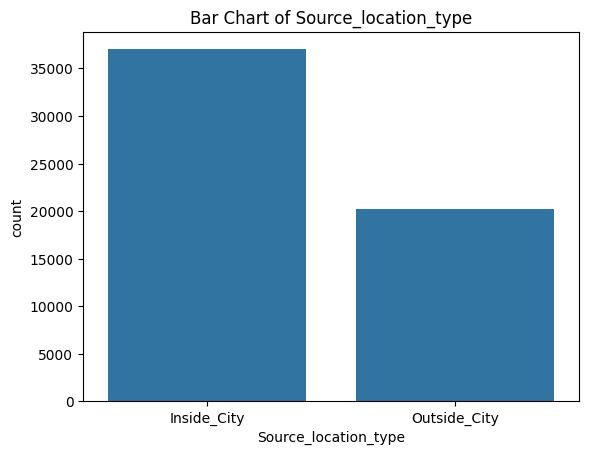

In [13]:
# Data Visualization
print("\n===== Data Visualization:  =====")
# Create a bar chart for the Categorical_Variable

print("\nData Visualization Customer_Type:")
sns.countplot(x='Customer_Type', data=df)
plt.title('Bar Chart of Customer_Type')
plt.show()

print("\nData Visualization Source_location_type:")
sns.countplot(x='Source_location_type', data=df)
plt.title('Bar Chart of Source_location_type')
plt.show()

print("\nData Visualization Destination_location_type:")
sns.countplot(x='Destination_location_type', data=df)
plt.title('Bar Chart of Destination_location_type')
plt.show()

print("\nData Visualization Peak:")
sns.countplot(x='Peak', data=df)
plt.title('Bar Chart of Peak')
plt.show()

print("\nData Visualization Time:")
sns.countplot(x='Time', data=df)
plt.title('Bar Chart of Time')
plt.show()

print("\nData Visualization Weather:")
sns.countplot(x='Weather', data=df)
plt.title('Bar Chart of Weather')
plt.show()

print("\nData Visualization Is_weekend:")
sns.countplot(x='Is_weekend', data=df)
plt.title('Bar Chart of Is_weekend')
plt.show()

print("\nData Visualization Source_location_type:")
sns.countplot(x='Source_location_type', data=df)
plt.title('Bar Chart of Source_location_type')
plt.show()


 ===== Pattern Recognition: =====


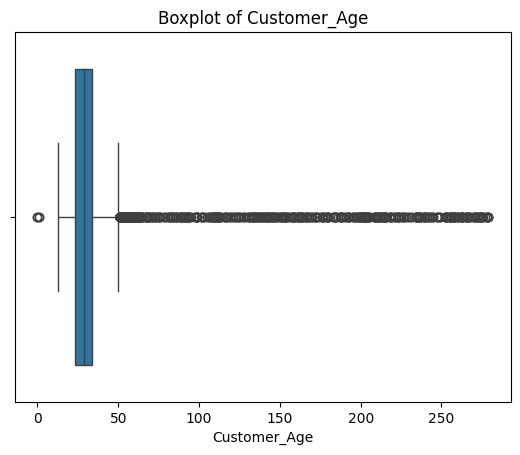

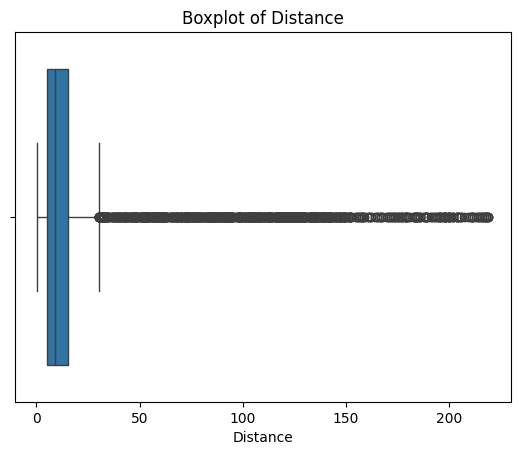

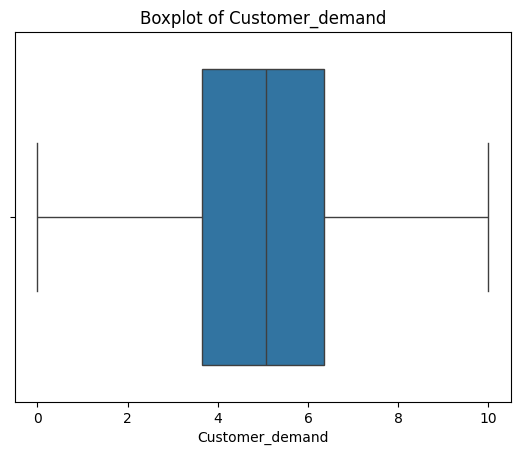

In [14]:
# Customer_Age	Distance	Customer_demand	Price

# Pattern Recognition
print("\n ===== Pattern Recognition: =====")
# Identify outliers in Customer_Age using a boxplot
sns.boxplot(x='Customer_Age', data=df)
plt.title('Boxplot of Customer_Age')
plt.show()

# Identify outliers in Distance using a boxplot
sns.boxplot(x='Distance', data=df)
plt.title('Boxplot of Distance')
plt.show()

# Identify outliers in Customer_demand using a boxplot
sns.boxplot(x='Customer_demand', data=df)
plt.title('Boxplot of Customer_demand')
plt.show()

In [ ]:
# Split the data into features and target variable
X = df.drop('Customer_demand', axis=1)
y = df['Customer_demand']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use the model to make predictions
predictions = model.predict(X_test)

# Print the predictions
print("Predictions: ", predictions)

# Calculate and print the accuracy metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)